<a href="https://colab.research.google.com/github/jyin4955/CSPostgraduate-408/blob/master/Final_version_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP5318 Assignment 2
*Make sure you change the file name with your unikey*


# 1. Data set up


In [ ]:
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from scipy.cluster.hierarchy import linkage, complete, dendrogram, fcluster
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Please comment your code
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## 1.1 Load Data

*Please upload both datasets (any file format is ok) to your google drive, and load the datasets through google drive file id in your code. If you want to use Jupyter, please submit all the dataset in an additional zip file.*



In [ ]:
id = '1CzLIh1bW_QgxP8MET3vr6XWLszGUkVCS'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Assignment 2 dataset - data1.csv')  
df1 = pd.read_csv('Assignment 2 dataset - data1.csv')

id = '1Mk3rGFH260LSI9iIf6JvoyL9PswyyAx5'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Assignment 2 dataset - data2.csv')  
df2 = pd.read_csv('Assignment 2 dataset - data2.csv')


In [ ]:
df2['session'].value_counts() # 24

Machine Learning in Visual Information Processing                                  5
Neural Network II                                                                  5
Neural Networks I                                                                  5
Ensemble Methods                                                                   5
Medicine and Bioinformatics                                                        5
Medicine, Science and Music                                                        5
Machine Learning Algorithms, Systems and Applications                              5
Semi-Supervised Learning                                                           5
Real-time Systems and Industry                                                     5
Feature Extraction and Selection                                                   5
Machine Learning I                                                                 5
Applications in Security                                         

## 1.2 Data Preprocessing (optional)

***You are required to show your data preprocessing methods for the two datasets (if necessary)***

*You can apply different data preprocessing techniques in different data and clustering models if you need.*


### Travel Review Dataset

In [ ]:
# Please comment your code

### ICMLA Datasets

In [ ]:
# extract only the abstract of the ICMLA Dataset
f2 = open('abstract.txt','w') 
for each in df2['abstract']:
  f2.write(each) 
  f2.write("\n")
f2.close()

In [ ]:

stemmer = SnowballStemmer("english")
nltk.download('punkt')
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


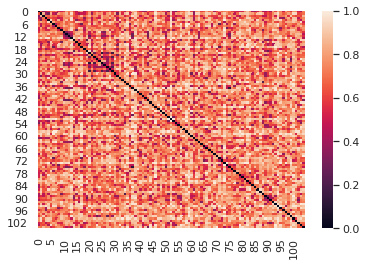

In [ ]:
f2 = open('abstract.txt','r')
### TfidfVectorizer will perform the vectorisation. Please explore the parameters at the user guide
tfidf_vectorizer_d2 = TfidfVectorizer(max_df=0.8, max_features=200000,
                                   analyzer='word',
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3)) #word数量的筛选

tfidf_matrix_d2 = tfidf_vectorizer_d2.fit_transform(f2)
# cosine_similarity
dist_d2 = 1 - cosine_similarity(tfidf_matrix_d2)

sns.set()
ax = sns.heatmap(dist_d2)

In [ ]:
tfidf_matrix_d2.shape

(105, 38)

In [ ]:
# tfidf_vectorizer_d2.vocabulary_.keys()

In [ ]:
# Dimensionality Reduction
pca = PCA(.95)
X_centered_d2 = tfidf_matrix_d2 - tfidf_matrix_d2.mean(axis=0)
pca.fit(X_centered_d2)
X_pca_d2 = pca.transform(X_centered_d2)
# https://colab.research.google.com/github/gal-a/blog/blob/master/docs/notebooks/nlp/nltk_tf-idf_clustering.ipynb#scrollTo=NN0LWJXzTBfD
print(X_pca_d2.shape)

(105, 29)


In [ ]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                          tfidf_vectorizer_d2.vocabulary_.keys())))

1 component: 8.65% of initial variance
-0.001 x model + -0.312 x train + 0.018 x data + 0.146 x paper + 0.143 x propos + 0.004 x new + 0.151 x approach + 0.038 x techniqu + -0.012 x use + 0.020 x learn + -0.073 x method + 0.132 x algorithm + -0.087 x base + 0.043 x consid + 0.616 x studi + -0.047 x result + -0.046 x improv + -0.111 x howev + -0.009 x compar + 0.005 x set + -0.191 x work + -0.379 x provid + 0.375 x accuraci + -0.037 x differ + 0.020 x machin + -0.076 x present + -0.080 x classif + -0.153 x machin learn + -0.117 x network + 0.101 x perform + -0.015 x classifi + -0.067 x applic + 0.019 x featur + -0.071 x comput + -0.037 x effect + 0.110 x process + -0.031 x problem + 0.024 x dataset
2 component: 7.28% of initial variance
-0.005 x model + -0.153 x train + -0.006 x data + -0.014 x paper + 0.024 x propos + -0.006 x new + 0.052 x approach + -0.033 x techniqu + -0.033 x use + -0.033 x learn + -0.039 x method + -0.118 x algorithm + -0.061 x base + -0.122 x consid + 0.302 x stu

In [ ]:
X_pca_d2


array([[-0.22722537, -0.11660269,  0.24522352, ...,  0.1607591 ,
         0.08427257, -0.09634845],
       [-0.0878902 ,  0.41301389,  0.03088848, ..., -0.09109431,
         0.04298251,  0.05007297],
       [-0.32684445, -0.17948944,  0.12355115, ..., -0.09368235,
        -0.11146892, -0.18528229],
       ...,
       [-0.28506309,  0.02484966,  0.14906254, ...,  0.05381752,
         0.07800974, -0.01394442],
       [-0.08909834,  0.24378679,  0.49991355, ...,  0.06443547,
         0.10178742, -0.06278238],
       [ 0.24956795,  0.42665832,  0.06135872, ...,  0.03044816,
         0.07025911, -0.06942161]])



---


# 2. K-means Clustering

## 2.1 Travel Review Dataset

### Train K-means clustering

In [ ]:
# Please comment your code

### First evaluation 

In [ ]:
# Please comment your code

### Second evaluation 

In [ ]:
# Please comment your code

## 2.2 ICMLA Dataset

### Train K-means clustering

In [ ]:
# Please comment your code

def kmeans_d2(X, n_clusters, rseed=2, similarity='euclidean'):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        # metric can be  'cosine', 'euclidean', 'manhattan'
        labels = pairwise_distances_argmin(X, centers, metric=similarity)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [ ]:
# euclidean
kmeans_euclidean_labels_d2 = []
kmeans_euclidean_centers_d2 = []
# manhattan
kmeans_manhattan_labels_d2 = []
kmeans_manhattan_centers_d2 = []
# cosine
kmeans_cosine_labels_d2 = []
kmeans_cosine_centers_d2 = []


for k in range(2, 40):
  # euclidean
  center, label = kmeans_d2(X_pca_d2, k, similarity = 'euclidean')
  kmeans_euclidean_labels_d2.append(label)
  kmeans_euclidean_centers_d2.append(center)
  # manhattan
  center, label = kmeans_d2(X_pca_d2, k, similarity = 'manhattan')
  kmeans_manhattan_labels_d2.append(label)
  kmeans_manhattan_centers_d2.append(center)
  # cosine
  center, label = kmeans_d2(X_pca_d2, k, similarity = 'cosine')
  kmeans_cosine_labels_d2.append(label)
  kmeans_cosine_centers_d2.append(center)

### First evaluation

In [ ]:
# 20200522 凌晨


In [ ]:
ground_truth = df2.iloc[:, -1]
ground_truth = ground_truth.to_numpy()

In [ ]:
ground_truth.shape

(105,)

In [ ]:
# completeness_score(y_ground_truth,dataset_2_kmeans_euclidean_labels[0])

In [ ]:
# metrics.adjusted_rand_score(labels_true, …)
# metrics.completeness_score(labels_true, …)
# metrics.fowlkes_mallows_score(labels_true, …)
# metrics.homogeneity_score(labels_true, …)
# metrics.mutual_info_score(labels_true, …)
# metrics.v_measure_score(labels_true, …[, beta])

In [ ]:
# Using completeness to evaluate Kmeans
fms_euclidean_d2 = []
fms_manhattan_d2 = []
fms_cosine_d2 = []
for i in range(len(kmeans_euclidean_labels_d2)):
  fms_euclidean_d2.append(fowlkes_mallows_score(ground_truth,kmeans_euclidean_labels_d2[i]))
  fms_manhattan_d2.append(fowlkes_mallows_score(ground_truth,kmeans_manhattan_labels_d2[i]))
  fms_cosine_d2.append(fowlkes_mallows_score(ground_truth,kmeans_cosine_labels_d2[i]))

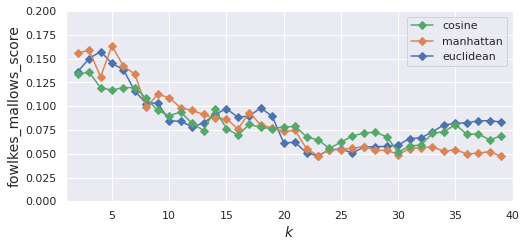

In [ ]:
# the graph of the completeness score of different similarity measures
plt.figure(figsize=(8, 3.5))
p1, = plt.plot(range(2, 40), fms_euclidean_d2, marker = 'D')
p2, = plt.plot(range(2, 40), fms_manhattan_d2, marker = 'D')
p3, = plt.plot(range(2, 40), fms_cosine_d2, marker = 'D')

l1 = plt.legend([p3, p2, p1], ['cosine', 'manhattan', 'euclidean'], loc='upper right')

plt.xlabel("$k$", fontsize=14)
plt.ylabel("fowlkes_mallows_score", fontsize=14) # 把score换掉, 就可以做另一个evaluation

plt.axis([1,40,0,0.2])
plt.show()

In [ ]:
# dataset_2_kmeans_euclidean_labels
max_fms_manhattan_d2 = max(fms_manhattan_d2[:34])
print("The fowlkes_mallows_score:", max_fms_manhattan_d2)
max_fms_manhattan_d2_index=fms_manhattan_d2[:34].index(max(fms_manhattan_d2[:34]))
k = max_fms_manhattan_d2_index + 2
print("k:",k)

The fowlkes_mallows_score: 0.16345460615958587
k: 5


### Second evaluation 

In [ ]:
# Using homogeneity to evaluate Kmeans
ars_euclidean_d2 = []
ars_manhattan_d2 = []
ars_cosine_d2 = []
for i in range(len(kmeans_euclidean_labels_d2)):
  ars_euclidean_d2.append(adjusted_rand_score(ground_truth, kmeans_euclidean_labels_d2[i]))
  ars_manhattan_d2.append(adjusted_rand_score(ground_truth, kmeans_manhattan_labels_d2[i]))
  ars_cosine_d2.append(adjusted_rand_score(ground_truth, kmeans_cosine_labels_d2[i]))

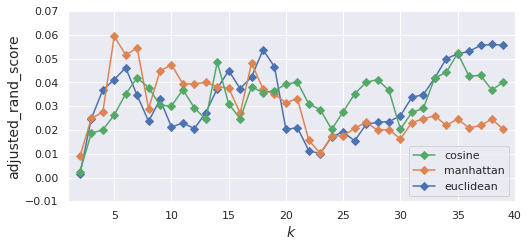

In [ ]:
plt.figure(figsize=(8, 3.5))
p1, = plt.plot(range(2,40), ars_euclidean_d2, marker = 'D')
p2, = plt.plot(range(2,40), ars_manhattan_d2, marker = 'D')
p3, = plt.plot(range(2,40), ars_cosine_d2, marker = 'D')

l1 = plt.legend([p3, p2, p1], ['cosine', 'manhattan', 'euclidean'])

plt.xlabel("$k$", fontsize=14)
plt.ylabel("adjusted_rand_score", fontsize=14)

plt.axis([1,40,-0.01,0.07])
plt.show()

In [ ]:
# max_ars_euclidean_d2 = max(zip(ars_euclidean_d2.values(), ars_euclidean_d2.keys()))

max_ars_manhattan_d2 = max(ars_manhattan_d2[:34])
print("The adjusted_rand_score:", max_ars_manhattan_d2)
max_ars_manhattan_d2_index=ars_manhattan_d2.index(max(ars_manhattan_d2[:34]))
k = max_ars_manhattan_d2_index + 2
print("k:",k)

The adjusted_rand_score: 0.0593873332080436
k: 5




---


# 3. Hierachical Clustering

## 3.1 Travel Review Dataset

### Train Hierarchical clustering 

In [ ]:
# Please comment your code

### First evaluation 

In [ ]:
# Please comment your code

### Second evaluation 

In [ ]:
# Please comment your code

## 3.2 ICMLA Dataset

### Train Hierarchical clustering 

In [ ]:
# Please comment your code

dist_cosine_d2 = 1 - cosine_similarity(X_pca_d2) # 让取值范围变成[0,2], 便于层次计算, 距离是负数不太行
dist_euclidean_d2 = euclidean_distances(X_pca_d2)
dist_manhattan_d2 = manhattan_distances(X_pca_d2)

# sns.set()
# ax = sns.heatmap(dist_cosine_d2)

In [ ]:
# a = linkage(dist_cosine, method='single', metric='cosine', optimal_ordering=True)
# a.shape

In [ ]:
# Please comment your code
### We'll use Scipy package for hierarchinal clustering
# linkage_matrix_d2 = linkage(dist_cosine_d2, method='single', metric='cosine', optimal_ordering=True)
#define the linkage_matrix using ward clustering pre-computed distances
# fig, ax = plt.subplots(figsize=(15, 30)) # set size
# ax = dendrogram(linkage_matrix_d2, orientation="right", labels=y_ground_truth)

# plt.tick_params(\
#     axis= 'x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off',
#     labelsize=15
#     )
# plt.tick_params(\
#     axis= 'y',          # changes apply to the y-axis
#     labelsize=15
#     )

# plt.tight_layout() #show plot with tight layout

#save figure as ward_clusters
#plt.savefig('single_cosine.png', dpi=200) 

### First evaluation

In [ ]:
# Please comment your code
# maxclust - t-最多多少类
# distance - t- 距离的阈值
# from collections import Counter
# labels = fcluster(linkage_matrix, criterion='maxclust', t=24)
# Counter(labels)

In [ ]:
e_labels_single_d2 = []
m_labels_single_d2 = []
c_labels_single_d2 = []

e_labels_complete_d2 = []
m_labels_complete_d2 = []
c_labels_complete_d2 = []

e_labels_average_d2 = []
m_labels_average_d2 = []
c_labels_average_d2 = []

linkage_e_single_d2 = linkage(dist_euclidean_d2, method='single', metric='euclidean', optimal_ordering=True)
linkage_m_single_d2 = linkage(dist_manhattan_d2, method='single', metric='cityblock', optimal_ordering=True)
linkage_c_single_d2 = linkage(dist_cosine_d2, method='single', metric='cosine', optimal_ordering=True)

linkage_e_complete_d2 = linkage(dist_euclidean_d2, method='complete', metric='euclidean', optimal_ordering=True)
linkage_m_complete_d2 = linkage(dist_manhattan_d2, method='complete', metric='cityblock', optimal_ordering=True)
linkage_c_complete_d2 = linkage(dist_cosine_d2, method='complete', metric='cosine', optimal_ordering=True)

linkage_e_average_d2 = linkage(dist_euclidean_d2, method='average', metric='euclidean', optimal_ordering=True)
linkage_m_average_d2 = linkage(dist_manhattan_d2, method='average', metric='cityblock', optimal_ordering=True)
linkage_c_average_d2 = linkage(dist_cosine_d2, method='average', metric='cosine', optimal_ordering=True)

for i in range(2,40):
  e_labels_single_d2.append(fcluster(linkage_e_single_d2, criterion='maxclust', t=i))
  m_labels_single_d2.append(fcluster(linkage_m_single_d2, criterion='maxclust', t=i))
  c_labels_single_d2.append(fcluster(linkage_c_single_d2, criterion='maxclust', t=i))

  e_labels_complete_d2.append(fcluster(linkage_e_complete_d2, criterion='maxclust', t=i))
  m_labels_complete_d2.append(fcluster(linkage_m_complete_d2, criterion='maxclust', t=i))
  c_labels_complete_d2.append(fcluster(linkage_c_complete_d2, criterion='maxclust', t=i))

  e_labels_average_d2.append(fcluster(linkage_e_average_d2, criterion='maxclust', t=i))
  m_labels_average_d2.append(fcluster(linkage_m_average_d2, criterion='maxclust', t=i))
  c_labels_average_d2.append(fcluster(linkage_c_average_d2, criterion='maxclust', t=i))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspicio

In [ ]:
# euclidean_labels

In [ ]:
# y_ground_truth

In [ ]:
# y_ground_truth.shape

In [ ]:
# Using homogeneity to evaluate Hierarchical
fms_e_single_hc_d2 = []
fms_m_single_hc_d2= []
fms_c_single_hc_d2 = []

fms_e_complete_hc_d2 = []
fms_m_complete_hc_d2= []
fms_c_complete_hc_d2 = []

fms_e_average_hc_d2 = []
fms_m_average_hc_d2= []
fms_c_average_hc_d2 = []
for i in range(len(e_labels_single_d2)):
  fms_e_single_hc_d2.append(fowlkes_mallows_score(ground_truth,e_labels_single_d2[i]))
  fms_m_single_hc_d2.append(fowlkes_mallows_score(ground_truth,m_labels_single_d2[i]))
  fms_c_single_hc_d2.append(fowlkes_mallows_score(ground_truth,c_labels_single_d2[i]))

  fms_e_complete_hc_d2.append(fowlkes_mallows_score(ground_truth,e_labels_complete_d2[i]))
  fms_m_complete_hc_d2.append(fowlkes_mallows_score(ground_truth,m_labels_complete_d2[i]))
  fms_c_complete_hc_d2.append(fowlkes_mallows_score(ground_truth,c_labels_complete_d2[i]))

  fms_e_average_hc_d2.append(fowlkes_mallows_score(ground_truth,e_labels_average_d2[i]))
  fms_m_average_hc_d2.append(fowlkes_mallows_score(ground_truth,m_labels_average_d2[i]))
  fms_c_average_hc_d2.append(fowlkes_mallows_score(ground_truth,c_labels_average_d2[i]))

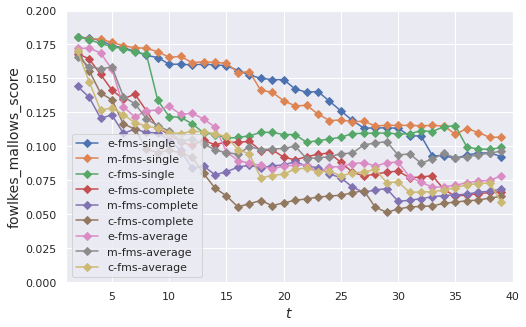

In [ ]:
plt.figure(figsize=(8, 5))
p1, = plt.plot(range(2,40), fms_e_single_hc_d2, marker = 'D')
p2, = plt.plot(range(2,40), fms_m_single_hc_d2, marker = 'D')
p3, = plt.plot(range(2,40), fms_c_single_hc_d2, marker = 'D')

p4, = plt.plot(range(2,40), fms_e_complete_hc_d2, marker = 'D')
p5, = plt.plot(range(2,40), fms_m_complete_hc_d2, marker = 'D')
p6, = plt.plot(range(2,40), fms_c_complete_hc_d2, marker = 'D')

p7, = plt.plot(range(2,40), fms_e_average_hc_d2, marker = 'D')
p8, = plt.plot(range(2,40), fms_m_average_hc_d2, marker = 'D')
p9, = plt.plot(range(2,40), fms_c_average_hc_d2, marker = 'D')


plt.legend([p1, p2, p3, p4, p5, p6, p7, p8, p9], ['e-fms-single', 'm-fms-single','c-fms-single', 'e-fms-complete', 'm-fms-complete','c-fms-complete', 'e-fms-average', 'm-fms-average', 'c-fms-average'])

plt.xlabel("$t$", fontsize=14)
plt.ylabel("fowlkes_mallows_score", fontsize=14) # 把score换掉, 就可以做另一个evaluation

plt.axis([1,40,0,0.2])
plt.show()

### Second evalaution 

In [ ]:
# Using normalized_mutual_info_score to evaluate Hierarchical
amis_e_single_hc_d2 = []
amis_m_single_hc_d2= []
amis_c_single_hc_d2 = []

amis_e_complete_hc_d2 = []
amis_m_complete_hc_d2= []
amis_c_complete_hc_d2 = []

amis_e_average_hc_d2 = []
amis_m_average_hc_d2= []
amis_c_average_hc_d2 = []
for i in range(len(e_labels_single_d2)):
  amis_e_single_hc_d2.append(adjusted_mutual_info_score(ground_truth,e_labels_single_d2[i]))
  amis_m_single_hc_d2.append(adjusted_mutual_info_score(ground_truth,m_labels_single_d2[i]))
  amis_c_single_hc_d2.append(adjusted_mutual_info_score(ground_truth,c_labels_single_d2[i]))

  amis_e_complete_hc_d2.append(adjusted_mutual_info_score(ground_truth,e_labels_complete_d2[i]))
  amis_m_complete_hc_d2.append(adjusted_mutual_info_score(ground_truth,m_labels_complete_d2[i]))
  amis_c_complete_hc_d2.append(adjusted_mutual_info_score(ground_truth,c_labels_complete_d2[i]))

  amis_e_average_hc_d2.append(adjusted_mutual_info_score(ground_truth,e_labels_average_d2[i]))
  amis_m_average_hc_d2.append(adjusted_mutual_info_score(ground_truth,m_labels_average_d2[i]))
  amis_c_average_hc_d2.append(adjusted_mutual_info_score(ground_truth,c_labels_average_d2[i]))

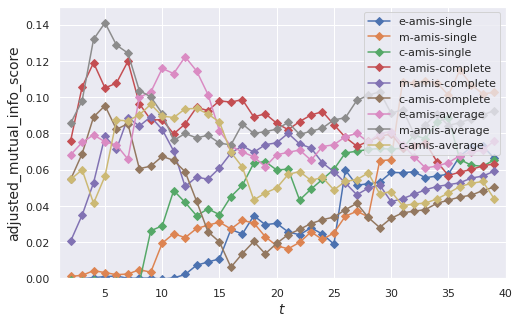

In [ ]:
# Please comment your code
plt.figure(figsize=(8, 5))
p1, = plt.plot(range(2,40), amis_e_single_hc_d2, marker = 'D')
p2, = plt.plot(range(2,40), amis_m_single_hc_d2, marker = 'D')
p3, = plt.plot(range(2,40), amis_c_single_hc_d2, marker = 'D')

p4, = plt.plot(range(2,40), amis_e_complete_hc_d2, marker = 'D')
p5, = plt.plot(range(2,40), amis_m_complete_hc_d2, marker = 'D')
p6, = plt.plot(range(2,40), amis_c_complete_hc_d2, marker = 'D')

p7, = plt.plot(range(2,40), amis_e_average_hc_d2, marker = 'D')
p8, = plt.plot(range(2,40), amis_m_average_hc_d2, marker = 'D')
p9, = plt.plot(range(2,40), amis_c_average_hc_d2, marker = 'D')


plt.legend([p1, p2, p3, p4, p5, p6, p7, p8, p9], ['e-amis-single', 'm-amis-single','c-amis-single', 'e-amis-complete', 'm-amis-complete','c-amis-complete', 'e-amis-average', 'm-amis-average', 'c-amis-average'])

plt.xlabel("$t$", fontsize=14)
plt.ylabel("adjusted_mutual_info_score", fontsize=14) # 把score换掉, 就可以做另一个evaluation

plt.axis([1,40,0,0.15])
plt.show()

In [ ]:
# max_ars_euclidean_d2 = max(zip(ars_euclidean_d2.values(), ars_euclidean_d2.keys()))

max_amis_m_average_hc_d2 = max(amis_m_average_hc_d2[:34])
print("The adjusted_mutual_info_score:", max_amis_m_average_hc_d2)
max_amis_m_average_hc_d2_index=amis_m_average_hc_d2[:34].index(max(amis_m_average_hc_d2[:34]))
t = max_amis_m_average_hc_d2_index + 2
print("t:",t)

The adjusted_mutual_info_score: 0.14100842078366885
t: 5




---


# 4. DBSCAN Clustering

## 4.1 Travel Review Dataset

### Train DBSCAN clustering 

In [ ]:
# Please comment your code





In [ ]:
 #euclidean_score_dbscan

### First evaluation

In [ ]:
# Using homogeneity to evaluate Hierarchical
# np.arange(1, 5, .5)
dbscan_e_d2 = {}
dbscan_e_d2_range = np.arange(0.4, 1.1, .01)
for s in range(2,16):
  e_d2_dict = {}
  for r in dbscan_e_d2_range:
    e_d2 = DBSCAN(eps = r, metric = 'euclidean', min_samples = s).fit(X_pca_d2)
    e_d2_dict[r] = adjusted_mutual_info_score(ground_truth, e_d2.labels_)
  dbscan_e_d2[s] = e_d2_dict
  

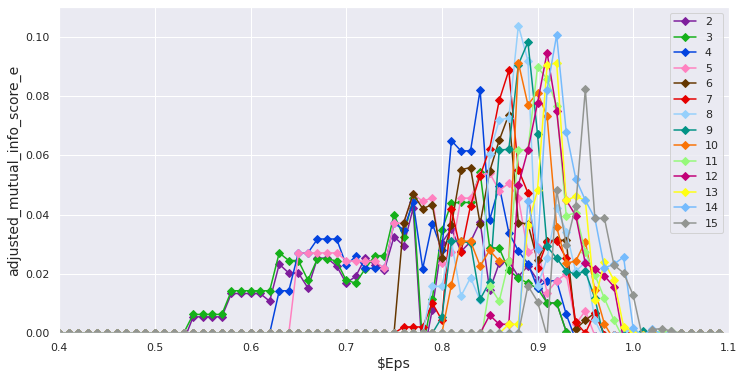

In [ ]:
# Please comment your code
plt.figure(figsize=(12,6))

amis_dbscan_e_d2 = []
for i in dbscan_e_d2.keys():
  amis_dbscan_e_d2.append(list(dbscan_e_d2[i].values()))

colors = ['#7e1e9c', '#15b01a', '#0343df', '#ff81c0', '#653700', '#e50000', '#95d0fc', '#029386', '#f97306', '#96f97b', '#c20078', '#ffff14', '#75bbfd', '#929591']
for i in range(0, len(amis_dbscan_e_d2)):
  plt.plot(dbscan_e_d2_range, amis_dbscan_e_d2[i], marker= 'D', label=i+2,color=colors[i])


plt.legend()

plt.xlabel("$Eps", fontsize=14)
plt.ylabel("adjusted_mutual_info_score_e", fontsize=14)

plt.axis([0.4,1.1,0,0.11])
plt.show()

In [ ]:
dbscan_m_d2 = {}
dbscan_m_d2_range = np.arange(1, 5, .1)
for s in range(2,16):
  m_d2_dict = {}
  for r in dbscan_m_d2_range:
    m_d2 = DBSCAN(eps = r, metric = 'manhattan', min_samples = s).fit(X_pca_d2)
    m_d2_dict[r] = adjusted_mutual_info_score(ground_truth, m_d2.labels_)
  dbscan_m_d2[s] = m_d2_dict

In [ ]:
# dbscan_m_d2

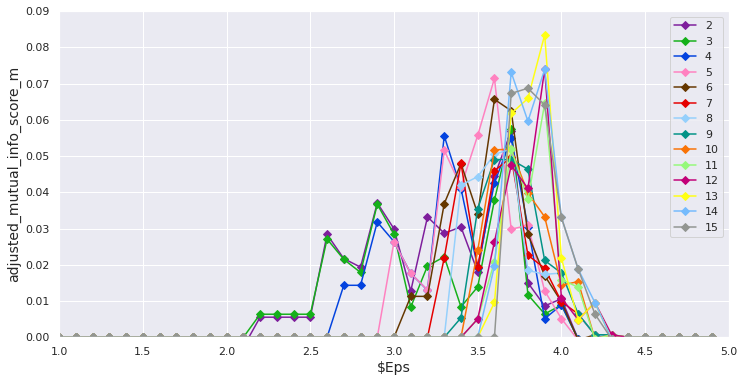

In [ ]:
plt.figure(figsize=(12,6))

amis_dbscan_m_d2 = []
for i in dbscan_m_d2.keys():
  amis_dbscan_m_d2.append(list(dbscan_m_d2[i].values()))

colors = ['#7e1e9c', '#15b01a', '#0343df', '#ff81c0', '#653700', '#e50000', '#95d0fc', '#029386', '#f97306', '#96f97b', '#c20078', '#ffff14', '#75bbfd', '#929591']
for i in range(0, len(amis_dbscan_m_d2)):
  plt.plot(dbscan_m_d2_range, amis_dbscan_m_d2[i], marker= 'D', label=i+2,color=colors[i])

plt.legend()
plt.xlabel("$Eps", fontsize=14)
plt.ylabel("adjusted_mutual_info_score_m", fontsize=14)

plt.axis([1,5,0,0.09])
plt.show()

In [ ]:
dbscan_c_d2 = {}
dbscan_c_d2_range = np.arange(0.1,0.8,0.005)
for s in range(2,16):
  c_d2_dict = {}
  for r in dbscan_c_d2_range:
    c_d2 = DBSCAN(eps = r, metric = 'cosine', min_samples = s).fit(X_pca_d2)
    c_d2_dict[r] = adjusted_mutual_info_score(ground_truth, c_d2.labels_)
  dbscan_c_d2[s] = c_d2_dict

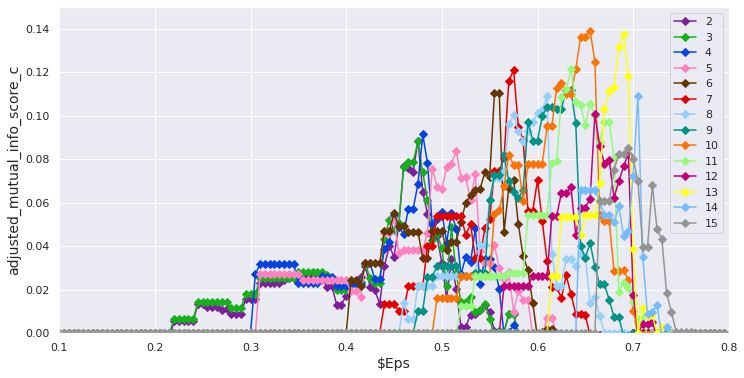

In [ ]:
plt.figure(figsize=(12,6))

amis_dbscan_c_d2 = []
for i in dbscan_c_d2.keys():
  amis_dbscan_c_d2.append(list(dbscan_c_d2[i].values()))

colors = ['#7e1e9c', '#15b01a', '#0343df', '#ff81c0', '#653700', '#e50000', '#95d0fc', '#029386', '#f97306', '#96f97b', '#c20078', '#ffff14', '#75bbfd', '#929591']
for i in range(0, len(amis_dbscan_c_d2)):
  plt.plot(dbscan_c_d2_range, amis_dbscan_c_d2[i], marker= 'D', label=i+2,color=colors[i])

plt.legend()
plt.xlabel("$Eps", fontsize=14)
plt.ylabel("adjusted_mutual_info_score_c", fontsize=14)

plt.axis([0.1,0.8,0,0.15])
plt.show()

In [ ]:
# min_sample = 10
max_amis_dbscan_c_d2 = max(zip(dbscan_c_d2[10].values(),dbscan_c_d2[10].keys()))
print("adjusted_mutual_info_score_c:", max_amis_dbscan_c_d2[0])
print("eps:", max_amis_dbscan_c_d2[1])
# dbscan_c_d2[10]

adjusted_mutual_info_score_c: 0.13925479210621491
eps: 0.6550000000000005


In [ ]:
# max_amis_dbscan_c_d2 = max(zip(amis_dbscan_c_d2.values(), amis_dbscan_c_d2.keys()))

### Second evaluation 

In [ ]:
dbscan_e_d2 = {}
dbscan_e_d2_range = np.arange(0.4,1.1,.01)
for s in range(2,16):
  e_d2_dict = {}
  for r in dbscan_e_d2_range:
    e_d2 = DBSCAN(eps = r, metric = 'euclidean', min_samples = s).fit(X_pca_d2)
    e_d2_dict[r] = adjusted_rand_score(ground_truth, e_d2.labels_)
  dbscan_e_d2[s] = e_d2_dict

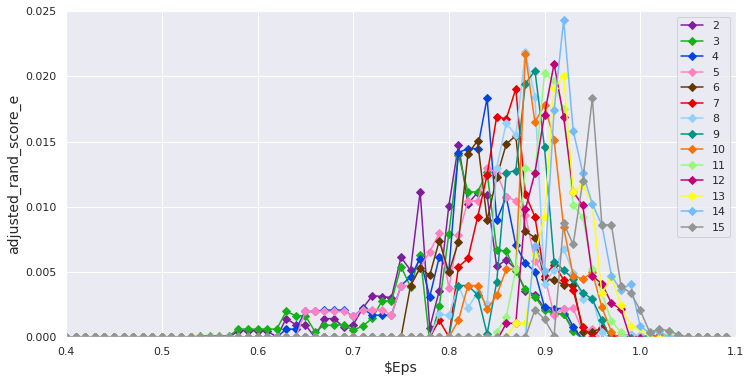

In [ ]:
plt.figure(figsize=(12,6))

ars_dbscan_e_d2 = []
for i in dbscan_e_d2.keys():
  ars_dbscan_e_d2.append(list(dbscan_e_d2[i].values()))

colors = ['#7e1e9c', '#15b01a', '#0343df', '#ff81c0', '#653700', '#e50000', '#95d0fc', '#029386', '#f97306', '#96f97b', '#c20078', '#ffff14', '#75bbfd', '#929591']
for i in range(0, len(ars_dbscan_e_d2)):
  plt.plot(dbscan_e_d2_range, ars_dbscan_e_d2[i], marker= 'D', label=i+2,color=colors[i])

plt.legend()
plt.xlabel("$Eps", fontsize=14)
plt.ylabel("adjusted_rand_score_e", fontsize=14)

plt.axis([0.4,1.1,0,0.025])
plt.show()

In [ ]:
dbscan_m_d2 = {}
dbscan_m_d2_range = np.arange(2,4.5,.1)
for s in range(2,16):
  m_d2_dict = {}
  for r in dbscan_m_d2_range:
    m_d2 = DBSCAN(eps = r, metric = 'manhattan', min_samples = s).fit(X_pca_d2)
    m_d2_dict[r] = adjusted_rand_score(ground_truth, m_d2.labels_)
  dbscan_m_d2[s] = m_d2_dict

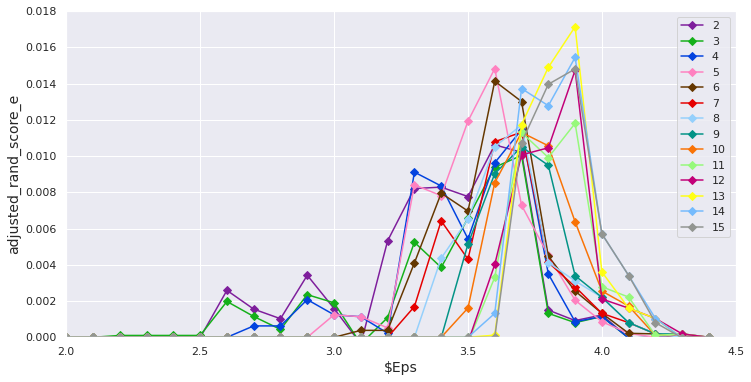

In [ ]:
plt.figure(figsize=(12,6))

ars_dbscan_m_d2 = []
for i in dbscan_m_d2.keys():
  ars_dbscan_m_d2.append(list(dbscan_m_d2[i].values()))

colors = ['#7e1e9c', '#15b01a', '#0343df', '#ff81c0', '#653700', '#e50000', '#95d0fc', '#029386', '#f97306', '#96f97b', '#c20078', '#ffff14', '#75bbfd', '#929591']
for i in range(0, len(ars_dbscan_m_d2)):
  plt.plot(dbscan_m_d2_range, ars_dbscan_m_d2[i], marker= 'D', label=i+2,color=colors[i])

plt.legend()
plt.xlabel("$Eps", fontsize=14)
plt.ylabel("adjusted_rand_score_e", fontsize=14)

plt.axis([2,4.5,0,0.018])
plt.show()

In [ ]:
dbscan_c_d2 = {}
dbscan_c_d2_range = np.arange(0.2,0.9,0.005)
for s in range(2,16):
  c_d2_dict = {}
  for r in dbscan_c_d2_range:
    c_d2 = DBSCAN(eps = r, metric = 'cosine', min_samples = s).fit(X_pca_d2)
    c_d2_dict[r] = adjusted_rand_score(ground_truth, c_d2.labels_)
  dbscan_c_d2[s] = c_d2_dict

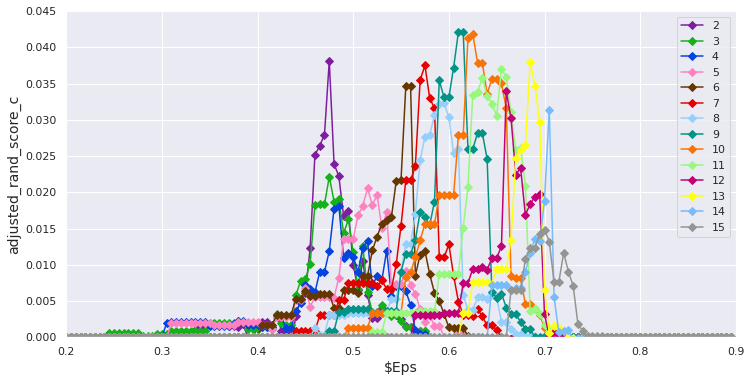

In [ ]:
plt.figure(figsize=(12,6))

ars_dbscan_c_d2 = []
for i in dbscan_c_d2.keys():
  ars_dbscan_c_d2.append(list(dbscan_c_d2[i].values()))

colors = ['#7e1e9c', '#15b01a', '#0343df', '#ff81c0', '#653700', '#e50000', '#95d0fc', '#029386', '#f97306', '#96f97b', '#c20078', '#ffff14', '#75bbfd', '#929591']
for i in range(0, len(ars_dbscan_c_d2)):
  plt.plot(dbscan_c_d2_range, ars_dbscan_c_d2[i], marker= 'D', label=i+2,color=colors[i])

plt.legend()
plt.xlabel("$Eps", fontsize=14)
plt.ylabel("adjusted_rand_score_c", fontsize=14)

plt.axis([0.2,0.9,0,0.045])
plt.show()

In [ ]:
# min_sample = 9
max_ars_dbscan_c_d2 = max(zip(dbscan_c_d2[9].values(),dbscan_c_d2[9].keys()))
print("adjusted_rand_score_c:", max_ars_dbscan_c_d2[0])
print("eps:", max_ars_dbscan_c_d2[1])
# dbscan_c_d2[9]

adjusted_rand_score_c: 0.042130407391852163
eps: 0.6150000000000004


## 4.2 ICMLA Dataset

### Train DBSCAN clustering 

In [ ]:
# Please comment your code

### First evaluation 

In [ ]:
# Please comment your code

### Second evaluation 

In [ ]:
# Please comment your code